In [2]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

In [155]:
# Connect to or create a new database file called 'superstore_database.db'

conn = sqlite3.connect('superstore_database.db')

In [156]:
# Create a cursor

cursor = conn.cursor()

In [273]:
db = pd.read_csv("Sample-Superstore.csv", encoding='latin1')

In [277]:
db.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
db["purchase_price "] =(db["Sales"] + db["Profit"])/db.Quantity

In [7]:
# SALES
conn.execute(
    """
    CREATE TABLE sales (
        SalesID INTEGER ,
        OrderID TEXT NOT NULL,
        ProductID TEXT NOT NULL,
        Sales REAL,
        Quantity INTEGER,
        Discount REAL,
        Profit REAL,
        PRIMARY KEY(SalesID),
        FOREIGN KEY(OrderID) REFERENCES orders(OrderID),
        FOREIGN KEY(ProductID) REFERENCES products(ProductID)
        );
     """
)

# ORDERS
conn.execute(
    """
    CREATE TABLE orders (
        OrderID TEXT,
        OrderDate TEXT,
        ShipDate TEXT,
        ShipMode TEXT,
        CustomerID TEXT,
        PRIMARY KEY(OrderID),
        FOREIGN KEY(CustomerID) REFERENCES customers(CustomerID)
        );
    """
)

# CUSTOMERS
conn.execute(
    """
    CREATE TABLE customers (
        CustomerID TEXT PRIMARY KEY,
        CustomerName TEXT,
        Segment TEXT,
        Country TEXT,
        City TEXT,
        State TEXT,
        PostalCode TEXT,
        Region TEXT
        );
    """
)

# PRODUCTS
conn.execute(
    """
    CREATE TABLE products (
        ProductID TEXT PRIMARY KEY,
        PurchasePrice REAL
        Category TEXT,
        SubCategory TEXT,
        ProductName TEXT,
        );
    """
)

OperationalError: table sales already exists

In [76]:
#conn.execute('DROP TABLE IF EXISTS products')
# PRODUCTS
conn.execute(
    """
    CREATE TABLE products (
        ProductID TEXT PRIMARY KEY,
        PurchasePrice REAL,
        Category TEXT,
        SubCategory TEXT,
        ProductName TEXT
        );
    """
)



In [24]:
#Create Sales DB 
sales = db[["Order ID","Product ID", "Sales", "Quantity", "Discount", "Profit"]]


RangeIndex(start=0, stop=9994, step=1)

In [28]:
# Create index column 
sales=sales.rename_axis("SalesID").reset_index()

In [29]:
#Chanege the column name to correct 
sales.columns = [
    "SalesID",
    "OrderID",
    "ProductID",
    "Sales",
    "Quantity",
    "Discount",
    "Profit"
]

In [30]:
sales.head()

,SalesID,OrderID,ProductID,Sales,Quantity,Discount,Profit
0,0,CA-2016-152156,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,1,CA-2016-152156,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,2,CA-2016-138688,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,3,US-2015-108966,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,4,US-2015-108966,OFF-ST-10000760,22.3680,2,0.20,2.5164


In [33]:
#sales.to_sql('sales', conn, if_exists='append', index=False)
pd.read_sql("SELECT * FROM sales LIMIT 5", conn)

,SalesID,OrderID,ProductID,Sales,Quantity,Discount,Profit
0,0,CA-2016-152156,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,1,CA-2016-152156,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,2,CA-2016-138688,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,3,US-2015-108966,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,4,US-2015-108966,OFF-ST-10000760,22.3680,2,0.20,2.5164


#### Chane the columns names 

In [55]:
db.columns = ['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
       'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
       'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'PurchasePrice']

##### Create other db and tables

In [56]:
orders=db[['OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
       'CustomerID']]
customers = db[['CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
       'PostalCode', 'Region',]]
products = db[['ProductID', 'Category', 'SubCategory',
       'ProductName','PurchasePrice']]

In [77]:
# Remove duplicates from orders and customers DataFrames
#orders = orders.drop_duplicates(subset=['OrderID'])
#customers = customers.drop_duplicates(subset=['CustomerID'])
products = products.drop_duplicates(subset=['ProductID'])

# Insert the data into the tables using pandas to_sql method
#orders.to_sql('orders', conn, if_exists='append', index=False)
#customers.to_sql('customers', conn, if_exists='append', index=False)
products.to_sql('products', conn, if_exists='append', index=False)


1818

In [59]:
orders.duplicated().sum()

0

In [80]:
pd.read_sql("select * from products limit 5", conn)

,ProductID,PurchasePrice,Category,SubCategory,ProductName
0,FUR-BO-10001798,151.9368,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,317.1740,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,10.7457,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,114.9093,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,12.4422,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [85]:
cursor.execute("select * from products limit 5")
product_result = cursor.fetchall()
product_result

[('FUR-BO-10001798',
  151.9368,
  'Furniture',
  'Bookcases',
  'Bush Somerset Collection Bookcase'),
 ('FUR-CH-10000454',
  317.17400000000004,
  'Furniture',
  'Chairs',
  'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'),
 ('OFF-LA-10000240',
  10.7457,
  'Office Supplies',
  'Labels',
  'Self-Adhesive Address Labels for Typewriters by Universal'),
 ('FUR-TA-10000577',
  114.90929999999999,
  'Furniture',
  'Tables',
  'Bretford CR4500 Series Slim Rectangular Table'),
 ('OFF-ST-10000760',
  12.4422,
  'Office Supplies',
  'Storage',
  "Eldon Fold 'N Roll Cart System")]

In [11]:
# Using pandas read_sql to check the existing tables
tables_df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("Tables using pandas.read_sql:")
print(tables_df)

# Using cursor.execute to check the existing tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables_result = cursor.fetchall()
print("Tables using cursor.execute:")
for table in tables_result:
    print(table[0])

Tables using pandas.read_sql:
        name
0      sales
1     orders
2  customers
3      order
4   products
Tables using cursor.execute:
sales
orders
customers
order
products


In [20]:
#What is the category generating the maximum sales revenue?
pd.read_sql("select p.category, \
sum(s.sales) as total_revenue, \
sum(s.Profit) as Profit from sales s \
join products p on s.ProductID=p.ProductID group by p.category order by total_revenue desc ", conn)


,Category,total_revenue,Profit
0,Technology,835505.0330,145727.5281
1,Furniture,738985.8903,18616.4434
2,Office Supplies,712831.4040,120118.6449


In [37]:
#What are 5 states generating the maximum and minimum sales revenue?
print(" 5 states generating the maximum and minimum revenue")
sql_query = """
WITH cte AS (
    SELECT cst.State, SUM(s.Sales) AS total_revenue
    FROM sales s
    JOIN orders o ON s.OrderID = o.OrderID
    JOIN customers cst ON o.CustomerID = cst.CustomerID
    GROUP BY cst.State
),
top5 AS (
    SELECT * FROM cte ORDER BY total_revenue DESC LIMIT 5
),
bottom5 AS (
    SELECT * FROM cte ORDER BY total_revenue ASC LIMIT 5
)
SELECT * FROM top5
UNION ALL
SELECT * FROM bottom5;
"""

pd.read_sql(sql_query, conn)
#s.category, \
#sum(s.sales) as total_revenue, \
#sum(s.Profit) as Profit 

#from sales s \
#join product c on s.ProductID=c.ProductID )  ", conn)

 5 states generating the maximum revenue


,State,total_revenue
0,California,451036.5823
1,New York,279549.8235
2,Texas,192758.2049
3,Pennsylvania,142838.5510
4,Washington,133177.2518
5,Nevada,1214.9860
6,Maryland,1588.8100
7,Kansas,1727.6520
8,District of Columbia,2198.4500
9,South Dakota,2339.5980


In [15]:
print(" 5 states generating the minimum revenue")
pd.read_sql("with cte as (select * from sales s join orders c on s.OrderID=c.OrderID ) \
select cst.State, sum(c.Sales) total_revenue from cte c join customers  cst \
on c.CustomerID=cst.CustomerId group by cst.State order by sum(c.Sales) asc limit 5 ", conn)

 5 states generating the maximum revenue


,State,total_revenue
0,Nevada,1214.986
1,Maryland,1588.810
2,Kansas,1727.652
3,District of Columbia,2198.450
4,South Dakota,2339.598


In [77]:
#What are the 3 products in each product segment with the highest sales
print(" 5 states generating the minimum revenue")
# pd.read_sql(""" 
# select p.ProductName,s.segment, s.Sales from (
# with cte as 
# (select * from Sales s join orders c on s.OrderID=c.OrderID join customers cst on c.CustomerID=cst.CustomerID ) 
# select *, rank()over(partition by Segment order by Sales desc) as rnk from cte) s join products p 
# on s.ProductID =p.ProductID where rnk <= 3 """, conn)

sql_query = """
WITH ranked_sales AS (
    SELECT
        s.ProductID,
        cst.Segment,
        s.Sales,
        RANK() OVER (PARTITION BY cst.Segment ORDER BY s.Sales DESC) AS sales_rnk,
        rank()over(partition by cst.Segment order by s.Profit DESC) as profit_rnk
    FROM Sales s
    JOIN Orders o ON s.OrderID = o.OrderID
    JOIN Customers cst ON o.CustomerID = cst.CustomerID
)
SELECT
    p.ProductName,
    rs.Segment,
    rs.Sales,
    rs.sales_rnk,
    rs.profit_rnk
FROM ranked_sales rs
JOIN Products p ON rs.ProductID = p.ProductID
WHERE rs.sales_rnk <= 3
"""
pd.read_sql(sql_query, conn)

 5 states generating the minimum revenue


,ProductName,Segment,Sales,sales_rnk,profit_rnk
0,Canon imageCLASS 2200 Advanced Copier,Consumer,13999.960,1,1
1,Canon imageCLASS 2200 Advanced Copier,Consumer,10499.970,2,2
2,GBC Ibimaster 500 Manual ProClick Binding System,Consumer,9892.740,3,3
3,Canon imageCLASS 2200 Advanced Copier,Corporate,17499.950,1,1
4,"3D Systems Cube Printer, 2nd Generation, Magenta",Corporate,9099.930,2,2
5,Cubify CubeX 3D Printer Triple Head Print,Corporate,7999.980,3,3020
6,Cisco TelePresence System EX90 Videoconferenci...,Home Office,22638.480,1,1782
7,Canon imageCLASS 2200 Advanced Copier,Home Office,11199.968,2,1
8,Hewlett Packard LaserJet 3310 Copier,Home Office,5399.910,3,2


In [123]:
#What are the 3 best-seller products in each product segment? (Quantity-wise)
sql_query = """
with cte as (
    SELECT
        s.ProductID,
        cst.Segment,
        s.Sales,
        dense_rank()OVER( partition by cst.segment ORDER BY sum(s.Quantity) DESC) AS quantity_rnk,
        sum(s.Quantity) as total 
    FROM Sales s
    JOIN Orders o ON s.OrderID = o.OrderID
    JOIN Customers cst ON o.CustomerID = cst.CustomerID group by s.ProductID )
    select p.ProductName, c.Segment, c.quantity_rnk, c.total from cte c join products p on c.ProductID=p.ProductID where quantity_rnk <=3 
   """
pd.read_sql(sql_query, conn)

,ProductName,Segment,quantity_rnk,total
0,GBC Premium Transparent Covers with Diagonal L...,Consumer,1,67
1,"Situations Contoured Folding Chairs, 4/Set",Consumer,2,64
2,Avery Arch Ring Binders,Consumer,2,64
3,DAX Wood Document Frame,Consumer,3,57
4,Kingston Digital DataTraveler 16GB USB 2.0,Consumer,3,57
5,Chromcraft Round Conference Tables,Corporate,1,61
6,"Global Wood Trimmed Manager's Task Chair, Khaki",Corporate,2,59
7,"Global High-Back Leather Tilter, Burgundy",Corporate,3,54
8,Logitech P710e Mobile Speakerphone,Home Office,1,75
9,Xerox 1881,Home Office,2,70


In [124]:
#What are the 3 schlecht-seller products in each product segment? (Quantity-wise)
sql_query = """
with cte as (
    SELECT
        s.ProductID,
        cst.Segment,
        s.Sales,
        dense_rank()OVER( partition by cst.segment ORDER BY sum(s.Quantity) ASC) AS quantity_rnk,
        sum(s.Quantity) as total 
    FROM Sales s
    JOIN Orders o ON s.OrderID = o.OrderID
    JOIN Customers cst ON o.CustomerID = cst.CustomerID group by s.ProductID )
    select p.ProductName, c.Segment, c.quantity_rnk, c.total from cte c join products p on c.ProductID=p.ProductID where quantity_rnk <=3 
   """
pd.read_sql(sql_query, conn)

,ProductName,Segment,quantity_rnk,total
0,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",Consumer,1,1
1,Global Enterprise Series Seating Low-Back Swiv...,Consumer,1,1
2,Boston 1900 Electric Pencil Sharpener,Consumer,1,1
3,Xerox 20,Consumer,1,1
4,Ultra Commercial Grade Dual Valve Door Closer,Consumer,2,2
...,...,...,...,...
65,Canon Color ImageCLASS MF8580Cdw Wireless Lase...,Home Office,3,3
66,I.R.I.S IRISCard Anywhere 5 Card Scanner,Home Office,3,3
67,Wasp CCD Handheld Bar Code Reader,Home Office,3,3
68,Okidata B400 Printer,Home Office,3,3


In [218]:
#get most expensive product by segment 
sql_query = """ with cte as (select p.ProductName, p.PurchasePrice, cst.Segment, dense_rank()over(partition by cst.Segment order by s.Sales desc) as rnk from sales s 
join products p on s.ProductID = p.ProductID 
join orders o on s.OrderID = o.OrderID 
join customers cst on o.CustomerID=cst.CustomerID) select * from cte where rnk <= 3
"""
cursor.execute(sql_query)
rows = cursor.fetchall()

pd.DataFrame([row[0:] for row in rows], columns = ["ProductName", "PurchasePrice", "Segment", "Rank"])


,ProductName,PurchasePrice,Segment,Rank
0,Canon imageCLASS 2200 Advanced Copier,3779.9892,Consumer,1
1,Canon imageCLASS 2200 Advanced Copier,3779.9892,Consumer,2
2,GBC Ibimaster 500 Manual ProClick Binding System,76.0980,Consumer,3
3,Canon imageCLASS 2200 Advanced Copier,3779.9892,Corporate,1
4,"3D Systems Cube Printer, 2nd Generation, Magenta",1637.9874,Corporate,2
5,Cubify CubeX 3D Printer Triple Head Print,1039.9974,Corporate,3
6,Cisco TelePresence System EX90 Videoconferenci...,3471.2336,Home Office,1
7,Canon imageCLASS 2200 Advanced Copier,3779.9892,Home Office,2
8,Hewlett Packard LaserJet 3310 Copier,647.9892,Home Office,3


In [220]:
pd.read_sql("Select OrderDate from orders limit 5", conn)

,OrderDate
0,11/8/2016
1,6/12/2016
2,10/11/2015
3,6/9/2014
4,4/15/2017


In [234]:
new_sql = """ 
with cte as (
    select 
        substr(OrderDate, -4) || '-' || 
        case 
            when instr(OrderDate, '/') = 2 
            then '0' || substr(OrderDate, 1,1) 
            else substr(OrderDate,1,2) 
        end || '-' ||
        case 
            when instr(substr(OrderDate, instr(OrderDate,'/') +1), '/') = 2 
            then '0'|| substr(OrderDate, instr(OrderDate,'/') +1,1) 
            else substr(OrderDate, instr(OrderDate,'/') +1,2) 
        end  OrderDate 
    from orders) 
select instr(OrderDate, '-') as count from cte where instr(OrderDate, '-') = 5
"""
pd.read_sql(new_sql,conn)

,count
0,5
1,5
2,5
3,5
4,5
...,...
5004,5
5005,5
5006,5
5007,5


In [284]:
new_sql = """
WITH cte AS (
    SELECT *,
        substr(OrderDate, -4) as year, 
        CASE 
            WHEN instr(OrderDate, '/') = 2 
            THEN substr(OrderDate, 1, 1)  
            ELSE substr(OrderDate, 1, 2)  
        END as month,
        CASE 
            WHEN instr(substr(OrderDate, instr(OrderDate, '/') + 1), '/') = 2 
            THEN substr(OrderDate, instr(OrderDate, '/') + 1, 1)  
            ELSE substr(OrderDate, instr(OrderDate, '/') + 1, 2)  
        END AS day
    FROM orders
)
SELECT  year, sum(s.Sales) as purchased 
FROM cte c join sales s on c.OrderID=s.OrderID group by year order by  sum(s.Sales) DESC
"""

# Execute the query
yearly_sales = pd.read_sql(new_sql, conn)
print(yearly_sales)

   year    purchased
0  2017  733215.2552
1  2016  609205.5980
2  2014  484247.4981
3  2015  470532.5090


#### Yearly Sales Bar 

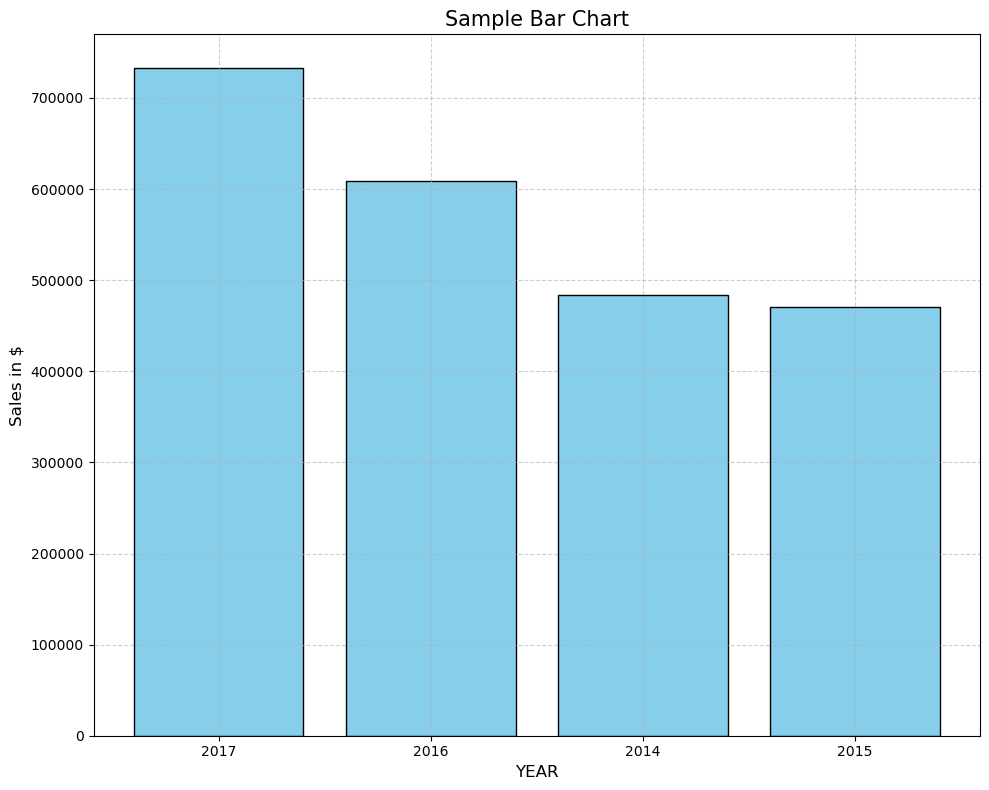

In [288]:
import matplotlib.pyplot as plt

# Sample data
categories = yearly_sales.year
values = yearly_sales.purchased

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar chart
ax.bar(categories, values, color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('YEAR', fontsize=12)
ax.set_ylabel('Sales in $', fontsize=12)
ax.set_title('Sample Bar Chart', fontsize=15)

# Adding grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [294]:
new_sql = """
WITH cte AS (
    SELECT *,
        substr(OrderDate, -4) as year, 
        CASE 
            WHEN instr(OrderDate, '/') = 2 
            THEN substr(OrderDate, 1, 1)  
            ELSE substr(OrderDate, 1, 2)  
        END as month,
        CASE 
            WHEN instr(substr(OrderDate, instr(OrderDate, '/') + 1), '/') = 2 
            THEN substr(OrderDate, instr(OrderDate, '/') + 1, 1)  
            ELSE substr(OrderDate, instr(OrderDate, '/') + 1, 2)  
        END AS day
    FROM orders
)
SELECT  month, sum(s.Sales) as purchased 
FROM cte c join sales s on c.OrderID=s.OrderID group by month order by  sum(s.Sales) DESC
"""

# Execute the query
monthly_sales = pd.read_sql(new_sql, conn)
monthly_sales["month"]= pd.to_datetime(monthly_sales["month"], format="%m").dt.strftime("%B")
print(monthly_sales)

        month    purchased
0    November  352461.0710
1    December  325293.5035
2   September  307649.9457
3       March  205005.4888
4     October  200322.9847
5      August  159044.0630
6         May  155028.8117
7        June  152718.6793
8        July  147238.0970
9       April  137762.1286
10    January   94924.8356
11   February   59751.2514


#### Monthly Sales 

/var/folders/_f/kkvs81ts6bn_m7y2gqnp_xjm0000gn/T/ipykernel_3442/315856053.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45)


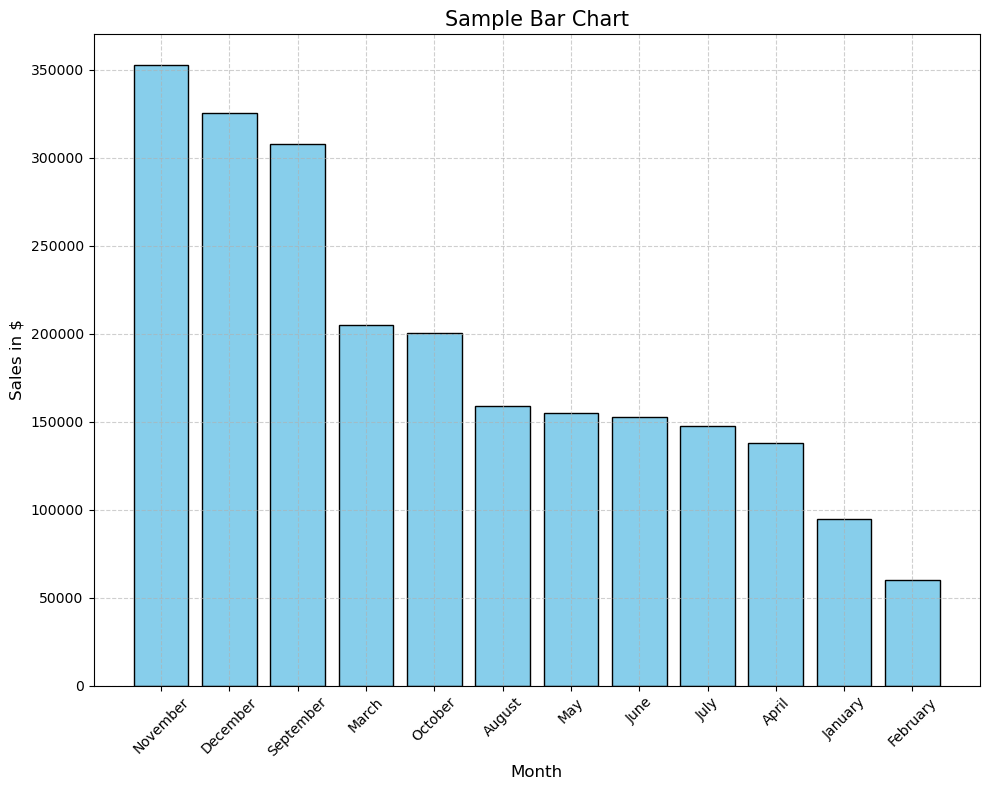

In [299]:
import matplotlib.pyplot as plt

# Sample data
categories = monthly_sales.month
values = monthly_sales.purchased

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar chart
ax.bar(categories, values, color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Sales in $', fontsize=12)
ax.set_title('Sample Bar Chart', fontsize=15)
ax.set_xticklabels(categories, rotation=45)
# Adding grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()